In [56]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수

from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

가중치 시각화

In [57]:
model = keras.models.load_model('cnn_model.keras')

In [58]:
model.layers

[<Conv2D name=conv2d_14, built=True>,
 <MaxPooling2D name=max_pooling2d_13, built=True>,
 <Flatten name=flatten_7, built=True>,
 <Dense name=dense_14, built=True>,
 <Dropout name=dropout_7, built=True>,
 <Dense name=dense_15, built=True>]

In [59]:
conv = model.layers[0]

In [60]:
# 필터 (3,3,32) 가중치 32
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 64) (64,)


In [61]:
# numpy 타입으로 변경
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.06902356 0.33254454


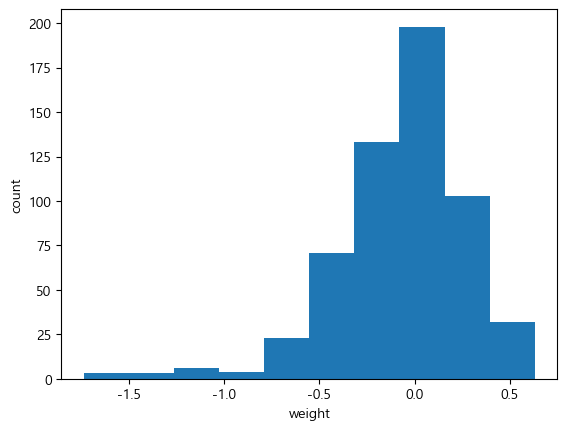

In [62]:
# 1차원 행렬로 변경
# 각각의 값을 히스토그램에 출력
# 0에 근접할수록 의미가 없고, 다른 값들은 의미가 존재
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

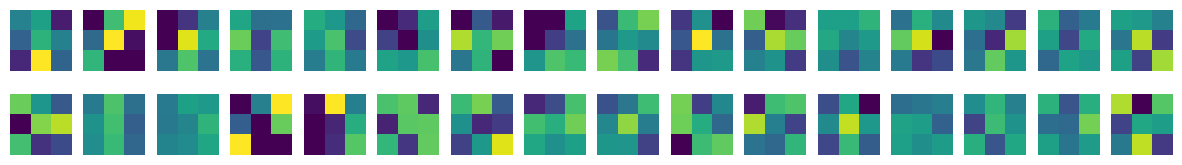

In [63]:
# 3x3x1 사이즈 32개 이미지를 출력
# 이미지 출력 2행 16열의 형태로 32개 그래프 출력
# vmin=-0.5,vmax=0.5 이미지마다 밝기가 다르기에 이것을 기준점으로 통일
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [64]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [66]:
no_training_weights = no_training_conv.weights[0].numpy()

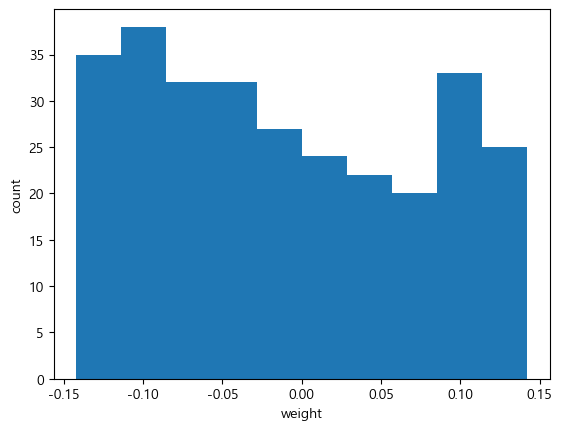

In [67]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [68]:
model.layers[0].input()

TypeError: 'KerasTensor' object is not callable

In [ ]:
model.layers[0].output()

In [ ]:
# keras.models.Model 넣어서 결과를 봄
# 모델을 새롭게 구성

conv_acti = keras.models.Model(model.layers[0].input, model.layers[0].output)

In [ ]:
# 데이터를 1개 뽑아서 위 model에 넣어서 확인
(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()

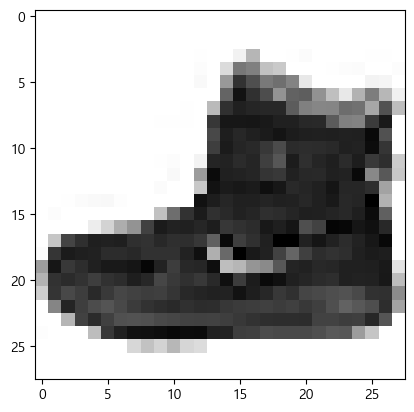

In [ ]:
# training_input[0] 데이터를 위 model을 가지고 예측
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [ ]:
# training_input[0] 데이터를 위 model을 가지고 예측
# 2차원행렬 -> 3차원행렬로 변경 / 255
inputs = train_input[0:1].reshape(-1,28,28,1)/255

In [ ]:
# 1개를 예측, 임시 model(conv_acti)에서 predict
feature_maps = conv_acti.predict(inputs) #conv2D 모델만 존재


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
# 32(64???)개의 필터의 활성화 맵이 구성됨
print(feature_maps.shape)

(1, 28, 28, 64)


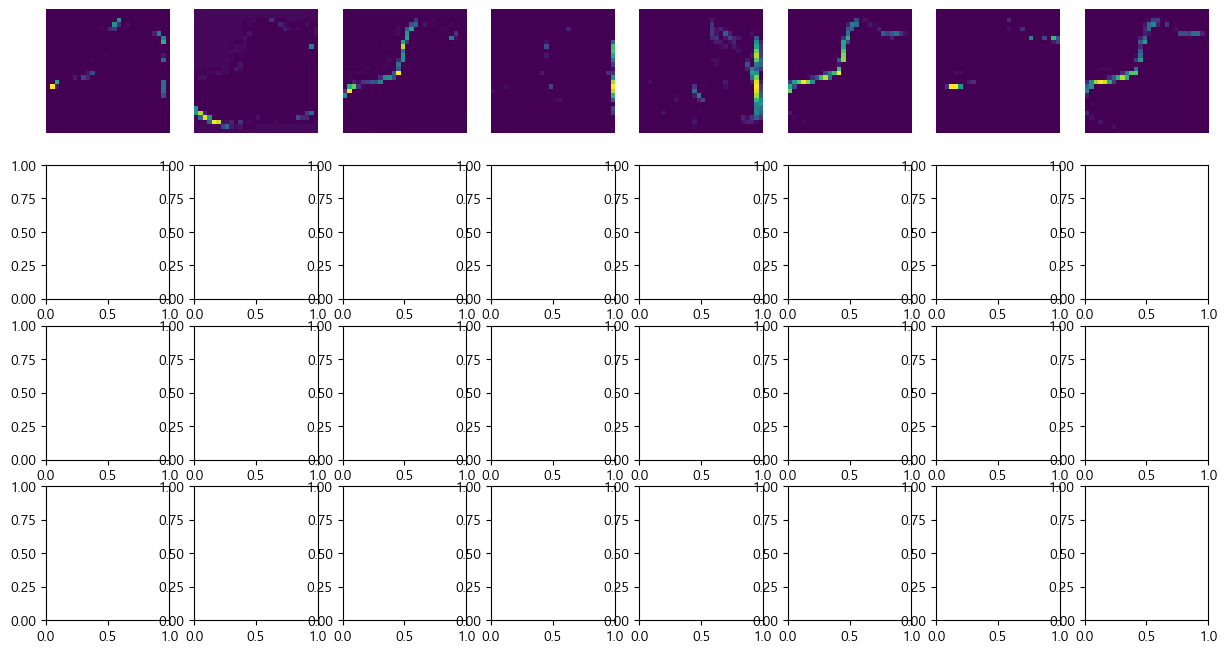

In [70]:
# 그래프 출력 - 활성화 맵(가중치 결과) 32장의 이미지가 출력
fig, axs = plt.subplots(4,8, figsize = (15,8))
for i in range(4):
    for j in range(8):
        # [0,0][0,1]..[1,7]
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j]) # 0,1,2,3,4...31
        axs[i,j].axis('off')
    plt.show()